# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
# Load the data (use delim_whitespace=True)
df = pd.read_csv("../../assets/datasets/salary.dat", delim_whitespace=True)
df.sort_values(by="sl", inplace=True)

print df.shape
# Take a look
df.head()

(52, 6)


,sx,rk,yr,dg,yd,sl
50,female,assistant,1,doctorate,1,15000
47,female,assistant,2,doctorate,2,15350
45,male,assistant,2,doctorate,1,16094
46,female,assistant,2,doctorate,6,16150
48,male,assistant,1,doctorate,1,16244


In [6]:
# Apply value_counts() to series for "sx", "dg", and "rk"

# print df['sx'].value_counts()
# print df['dg'].value_counts()
# print df['rk'].value_counts()

columns = ["sx", "dg", "rk"]
for column in columns:
    print df[column].value_counts()

male      38
female    14
Name: sx, dtype: int64
doctorate    34
masters      18
Name: dg, dtype: int64
full         20
assistant    18
associate    14
Name: rk, dtype: int64
male      38
female    14
Name: sx, dtype: int64
doctorate    34
masters      18
Name: dg, dtype: int64
full         20
assistant    18
associate    14
Name: rk, dtype: int64


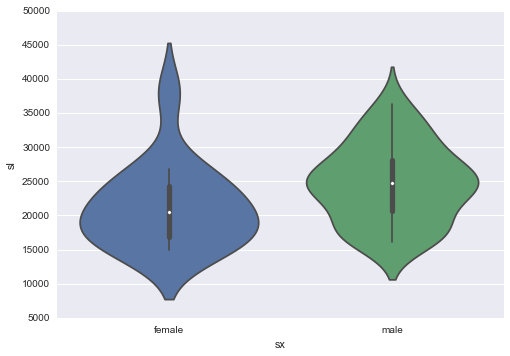

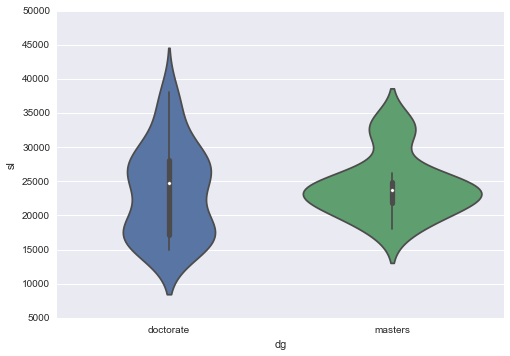

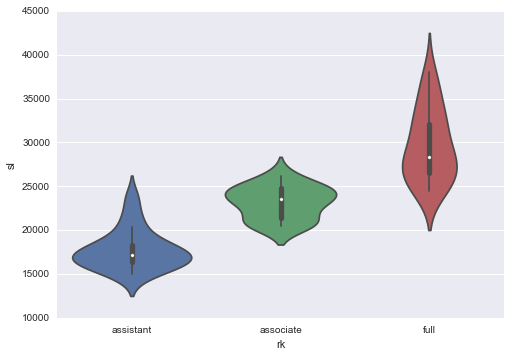

In [11]:
# Make violin plots

# sns.violinplot(x="sx", y="sl", data=df)
# plt.show()
# sns.violinplot(x="dg", y="sl", data=df)
# plt.show()
# sns.violinplot(x="rk", y="sl", data=df)
# plt.show()

columns = ["sx", "dg", "rk"]
for column in columns:
    sns.violinplot(x=column, y="sl", data=df)
    plt.show()


In [12]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
50,female,assistant,1,doctorate,1,15000,1.0,0.0,1.0,0.0,0.0,1.0,0.0
47,female,assistant,2,doctorate,2,15350,1.0,0.0,1.0,0.0,0.0,1.0,0.0
45,male,assistant,2,doctorate,1,16094,0.0,1.0,1.0,0.0,0.0,1.0,0.0
46,female,assistant,2,doctorate,6,16150,1.0,0.0,1.0,0.0,0.0,1.0,0.0
48,male,assistant,1,doctorate,1,16244,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [24]:
# Here's an example to get you started. Let's fit a model on a small random subset

from sklearn import cross_validation

X = df[['yr','yd']]
y = df.sl

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=0.5)

# subset = df.sample(frac=0.1, replace=False)
# X = subset[[u'yr', u'yd']]
# y = subset[u'sl']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
print "Train Score:", lm.score(X_train, y_train)
print "Test Score:", lm.score(X_test, y_test)

# Repeat with regularization

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
lm.fit(X_train, y_train)
print "Ridge Train Score:", lm.score(X_train, y_train)
print "Ridge Test Score:", lm.score(X_test, y_test)

# Did the results improve?

Train Score: 0.541473767549
Test Score: 0.563955007311
Ridge Train Score: 0.541450053932
Ridge Test Score: 0.562290239604


0.88630543814


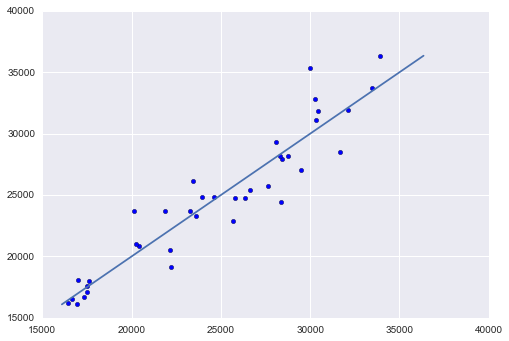

0.69448811957


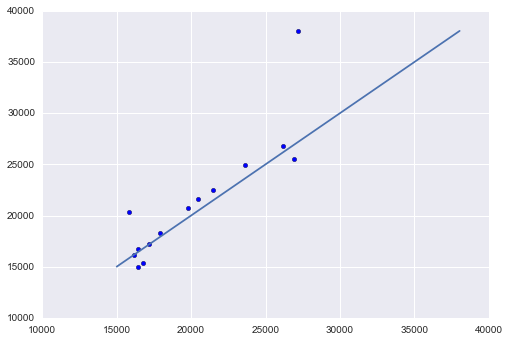

In [31]:
# Fit a model to the men
from sklearn import metrics

mask = df["sx"] == "male"
X = df[[u'yr', u'yd', u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_masters']]
y = df[u'sl']

X_male =  X[mask]
y_male =  y[mask]

## Fit a linear model here

male_lm = linear_model.LinearRegression().fit(X_male, y_male)
y_train_pred_male = male_lm.predict(X_male)

## Plot the data
## and print the model score

# print lm.score(X_male, y_male)
print metrics.r2_score(y_pred=y_train_pred_male, y_true=y_male)

plt.scatter(y_train_pred_male, y_male)
plt.plot((min(y_male), max(y_male)), (min(y_male), max(y_male)))
plt.show()

# Apply the same model to the women and compare the model score


female_mask = df["sx"] == "female"

X_female =  X[female_mask]
y_female =  y[female_mask]

y_train_male_pred_on_female = male_lm.predict(X_female)

print metrics.r2_score(y_pred=y_train_male_pred_on_female, y_true=y_female)

plt.scatter(y_train_male_pred_on_female, y_female)
plt.plot((min(y_female), max(y_female)), (min(y_female), max(y_female)))
plt.show()


0.781837240731


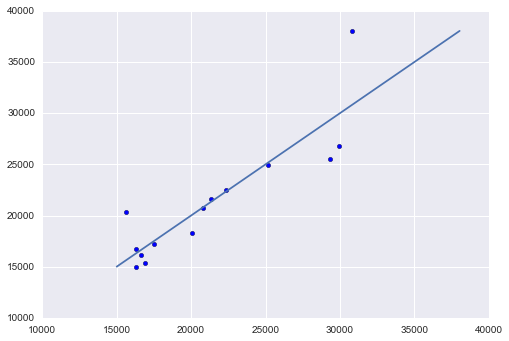

0.657523429275


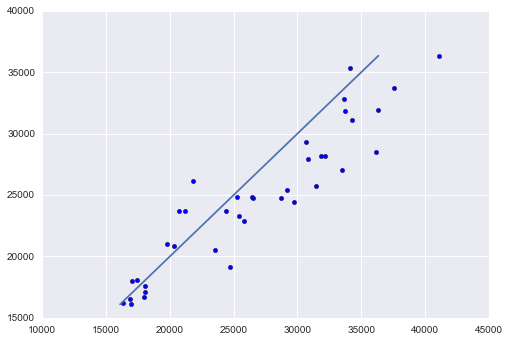

In [32]:
# What about the other order? Apply to women first

X = df[[u'yr', u'yd', u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_masters']]
y = df[u'sl']


female_mask = df["sx"] == "female"

X_female =  X[female_mask]
y_female =  y[female_mask]

## Fit a linear model here

female_lm = linear_model.LinearRegression().fit(X_female, y_female)

y_train_pred_female = female_lm.predict(X_female)

print metrics.r2_score(y_pred=y_train_pred_female, y_true=y_female)

plt.scatter(y_train_pred_female, y_female)
plt.plot((min(y_female), max(y_female)), (min(y_female), max(y_female)))
plt.show()

# Apply the same model to the women and compare the model score

mask = df["sx"] == "male"
X_male =  X[mask]
y_male =  y[mask]

y_train_pred_male = female_lm.predict(X_male)

## Plot the data
## and print the model score

# print lm.score(X_male, y_male)
print metrics.r2_score(y_pred=y_train_pred_male, y_true=y_male)

plt.scatter(y_train_pred_male, y_male)
plt.plot((min(y_male), max(y_male)), (min(y_male), max(y_male)))
plt.show()




# Apply to men


0.755592692047


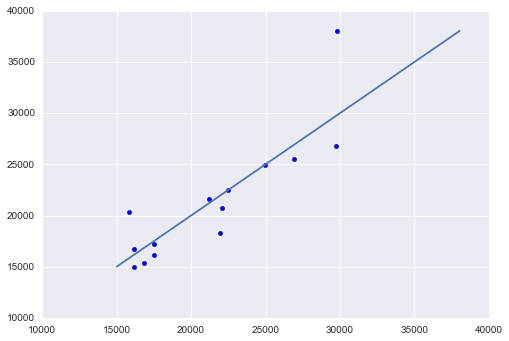

0.726774045766


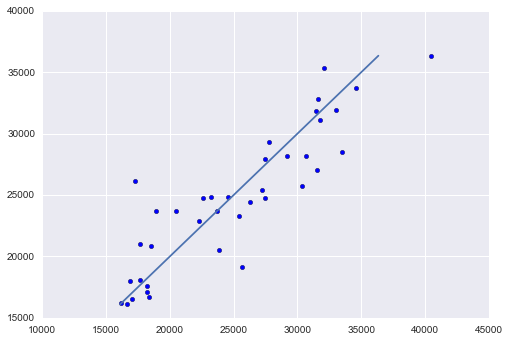

In [33]:
# This time use regularlization (RidgeCV)

# What about the other order? Apply to women first

X = df[[u'yr', u'yd', u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_masters']]
y = df[u'sl']


female_mask = df["sx"] == "female"

X_female =  X[female_mask]
y_female =  y[female_mask]

## Fit a linear model here

female_lm = linear_model.().fit(X_female, y_female)

y_train_pred_female = female_lm.predict(X_female)

print metrics.r2_score(y_pred=y_train_pred_female, y_true=y_female)

plt.scatter(y_train_pred_female, y_female)
plt.plot((min(y_female), max(y_female)), (min(y_female), max(y_female)))
plt.show()

# Apply the same model to the women and compare the model score

mask = df["sx"] == "male"
X_male =  X[mask]
y_male =  y[mask]

y_train_pred_male = female_lm.predict(X_male)

## Plot the data
## and print the model score

# print lm.score(X_male, y_male)
print metrics.r2_score(y_pred=y_train_pred_male, y_true=y_male)

plt.scatter(y_train_pred_male, y_male)
plt.plot((min(y_male), max(y_male)), (min(y_male), max(y_male)))
plt.show()




# Apply to men


### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

In [89]:
# Let's build a function to make all the next questions easier

def answer_question(mask, X, y, lm=linear_model.LinearRegression(), otherMasks = None):
    # mask = (df["dg"] == "doctorate")
    # X = df[[u'yr', u'yd', u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_masters']]
    # y = df[u'sl']

    X_masked =  X[mask]
    y_masked =  y[mask]

    ## Fit a linear model here
    
    lm.fit(X_masked, y_masked)
    y_train_pred = lm.predict(X_masked)

    ## Plot the data
    ## and print the model score

    # print lm.score(X_masked, y_masked)
    print metrics.r2_score(y_pred=y_train_pred, y_true=y_masked)

    plt.scatter(y_train_pred, y_masked)
    plt.plot((min(y_masked), max(y_masked)), (min(y_masked), max(y_masked)))
    plt.show()

    if (otherMasks is None) or len(otherMasks) == 0:
        inverted_mask = ~mask

        X_inverted =  X[inverted_mask]
        y_inverted =  y[inverted_mask]

        y_test_invertmask_pred = lm.predict(X_inverted)

        print metrics.r2_score(y_pred=y_test_invertmask_pred, y_true=y_inverted)

        plt.scatter(y_test_invertmask_pred, y_inverted)
        plt.plot((min(y_inverted), max(y_inverted)), (min(y_inverted), max(y_inverted)))
        plt.show()
        
    else:
        for mask_name, alternative_mask in otherMasks:
            
            X_alt =  X[alternative_mask]
            y_alt =  y[alternative_mask]

            y_test_altmask_pred = lm.predict(X_alt)

            print metrics.r2_score(y_pred=y_test_altmask_pred, y_true=y_alt)

            plt.scatter(y_test_altmask_pred, y_alt)
            plt.plot((min(y_alt), max(y_alt)), (min(y_alt), max(y_alt)))
            ax = plt.gca()
            ax.set_title(mask_name)
            plt.show()
    

0.876486548837


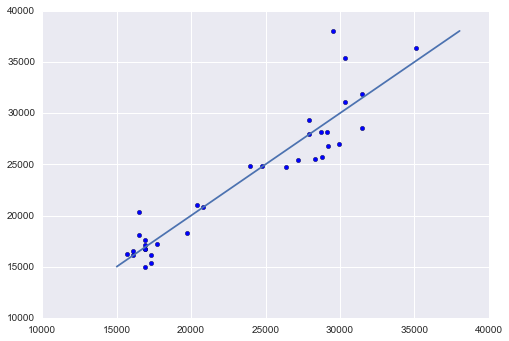

0.6849888843


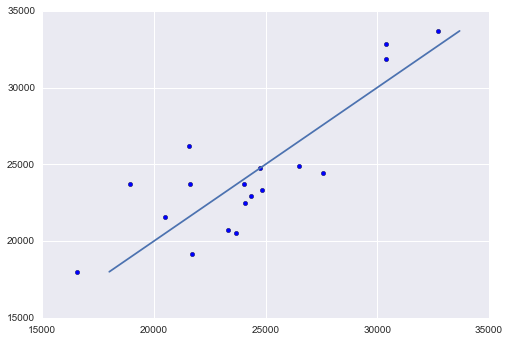

In [90]:
mask = df["dg"] == "doctorate"

X = df[[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[u'sl']
lm = linear_model.LinearRegression()

answer_question(mask=mask, X=X, y=y, lm=lm) 

0.797682614586


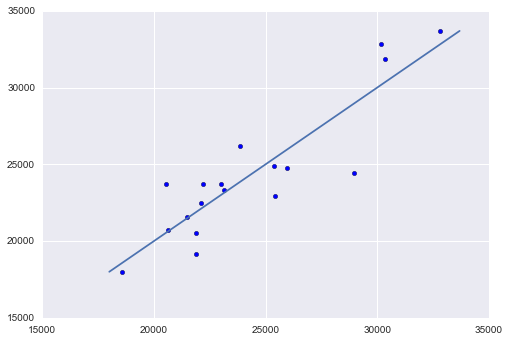

0.745050571834


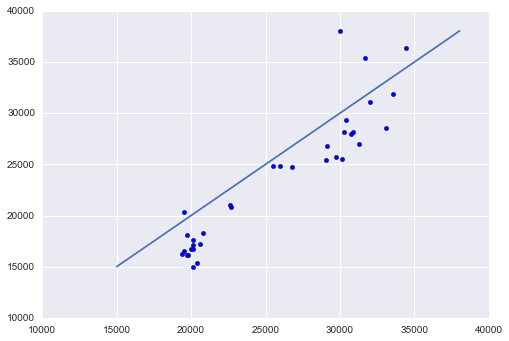

In [91]:
# Reverse the order

mask = df["dg"] != "doctorate"

X = df[[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[u'sl']
lm = linear_model.LinearRegression()

answer_question(mask=mask, X=X, y=y, lm=lm) 

0.797059287095


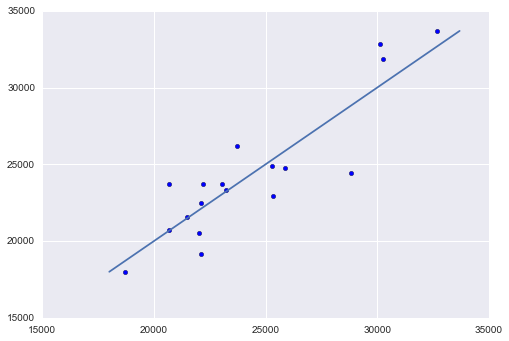

0.751666341865


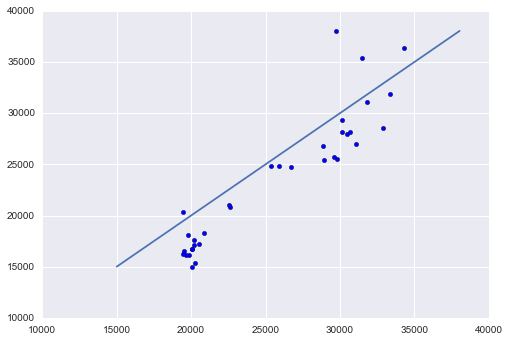

In [92]:
# With regularization

mask = df["dg"] != "doctorate"

X = df[[u'yr', u'yd', u'sx_female', u'sx_male', u'rk_assistant', u'rk_associate', u'rk_full']]
y = df[u'sl']
lm = linear_model.RidgeCV()

answer_question(mask=mask, X=X, y=y, lm=lm) 

### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

0.485373992873


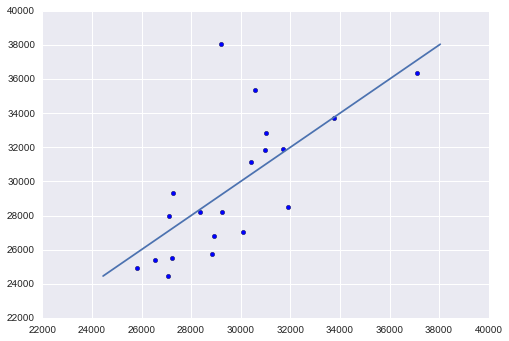

-7.3395402813


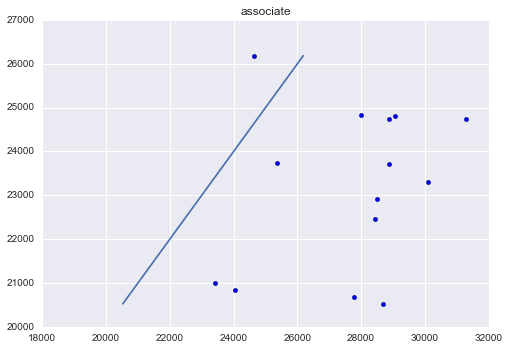

-13.0021725358


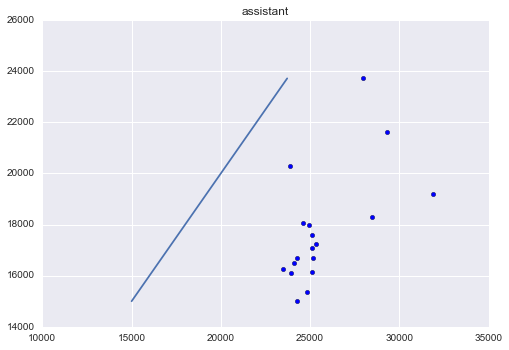

In [93]:
mask = (df["rk"] == "full") # First subset, there are two more

X = df[[u'yr', u'yd', u'sx_female', u'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[u'sl']
lm = linear_model.RidgeCV()

otherMasks = [(name, df["rk"] == name) for name in ['associate', 'assistant'] ]

answer_question(mask=mask, X=X, y=y, lm=lm, otherMasks = otherMasks) 

0.55397558087


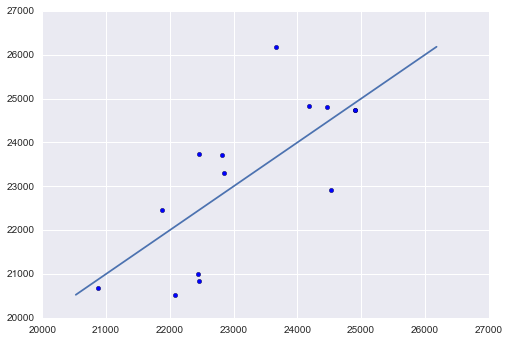

-2.26542390865


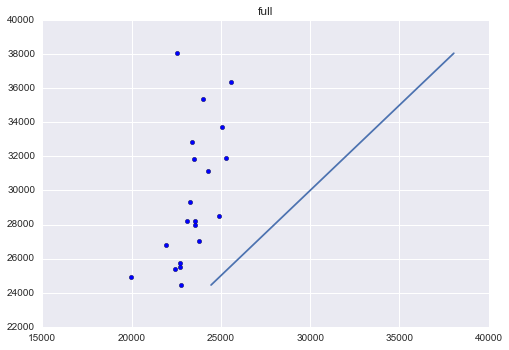

-7.37607432912


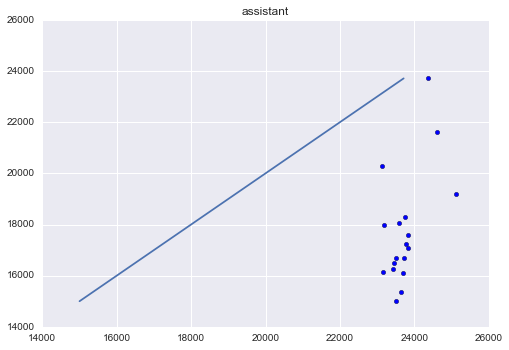

In [94]:
# The second permutation of three

mask = (df["rk"] == "associate") 

X = df[[u'yr', u'yd', u'sx_female', u'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[u'sl']
lm = linear_model.RidgeCV()

otherMasks = [(name, df["rk"] == name) for name in ['full', 'assistant'] ]

answer_question(mask=mask, X=X, y=y, lm=lm, otherMasks = otherMasks) 

0.439463063387


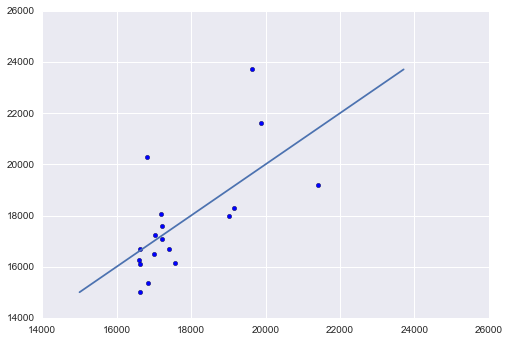

-4.76175750003


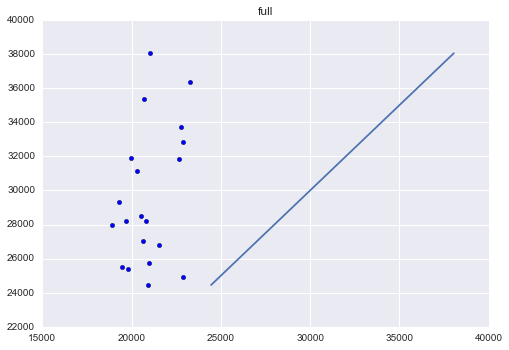

-4.30517647146


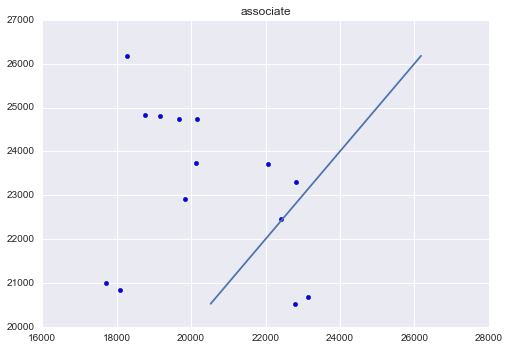

In [95]:
# The third permutation of three

mask = (df["rk"] == "assistant") 

X = df[[u'yr', u'yd', u'sx_female', u'sx_male', u'dg_doctorate', u'dg_masters']]
y = df[u'sl']
lm = linear_model.RidgeCV()

otherMasks = [(name, df["rk"] == name) for name in ['full', 'associate'] ]

answer_question(mask=mask, X=X, y=y, lm=lm, otherMasks = otherMasks) 

# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

0.926177658276


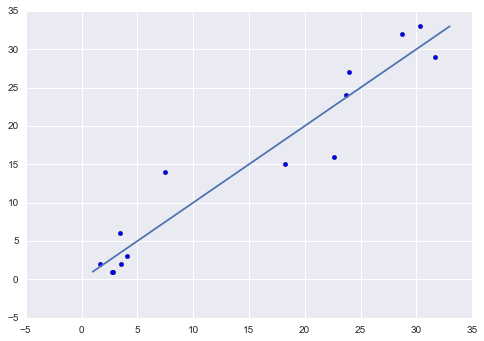

0.0479508851501


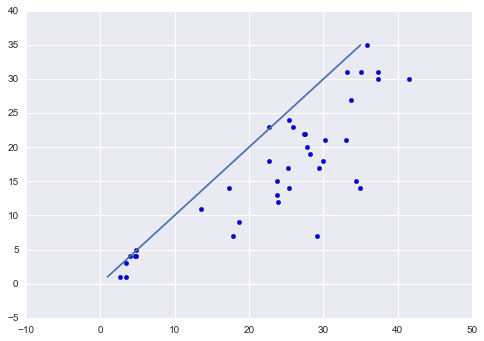

In [96]:
# Without regularization
mask = df["sx"] == "female"

X = df[[u'sl', u'yr', u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate', u'dg_masters']]
y = df[u'yd']
lm = linear_model.LinearRegression()

answer_question(mask=mask, X=X, y=y, lm=lm) 

0.904664798612


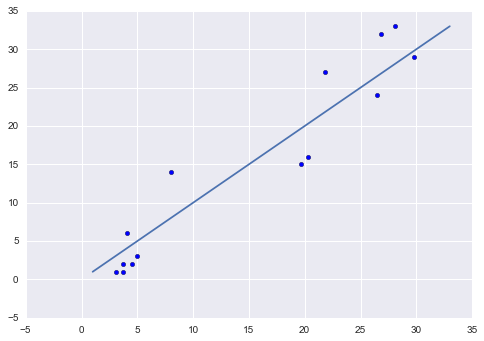

0.236984979343


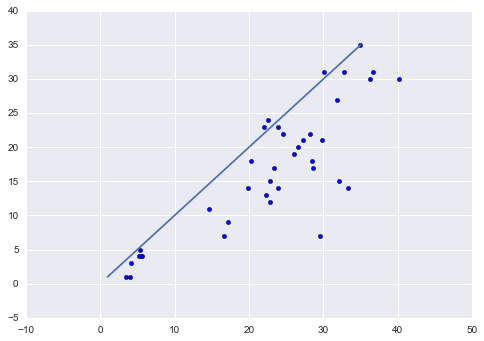

In [97]:
# With regularization, RidgeCV
lm = linear_model.RidgeCV()
answer_question(mask=mask, X=X, y=y, lm=lm) 

0.365747051318


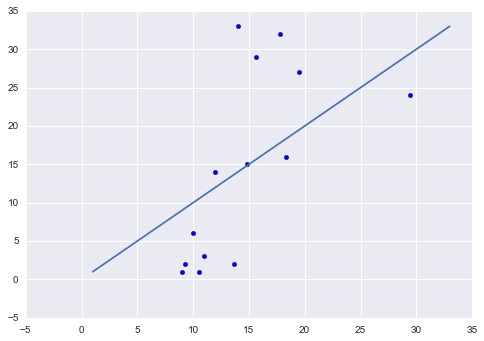

0.453023936668


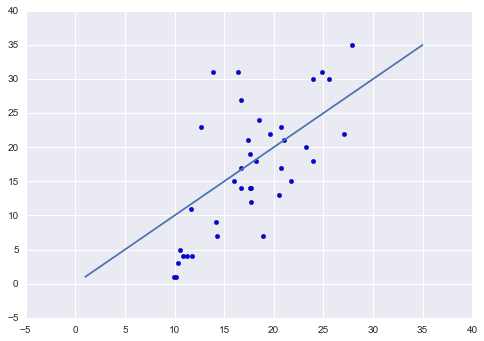

In [98]:
# With regularization, LassoCV
lm = linear_model.LassoCV()
answer_question(mask=mask, X=X, y=y, lm=lm) 